# Automatically split audio files by silcences

This notebook allows you to visualize audio files and split them by detecting silences based on min length and a tolerance. The objective is to agilize the process of obtaining a dataset with spoken words in different tones and entonations. With this notebook, you can record a large audio file and split it into several individual word audio files to train a CNN a posteriori.  

#### Authors
  - Víctor Aguado 218879
  - Mar Castroviejo 218880
  - Iu Ferrer 218860

#### Requeriments

For running this code you will need to install pydub and librosa libs. Please finde the required code in the next cells. 


In [ ]:
!pip install pydub

In [ ]:
!pip install librosa

## Google Colab and Drive Configuration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/Shareddrives/DeepLearning/Projecte_Final/Data/'
spec_path = '/content/drive/Shareddrives/DeepLearning/Projecte_Final/Spectograms/'
results_path = '/content/drive/Shareddrives/DeepLearning/Projecte_Final/Results/'

Mounted at /content/drive


## Visualize Audio File 

You can visualize the audio file that is going to be splitted to check if there are clear silences and the words are easily sperable. You can also take a look to the silence duration to determine the min silence length in next cell.

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


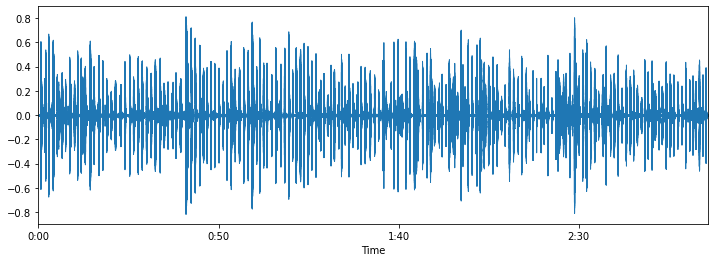

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

data, sampling_rate = librosa.load(data_path + "audio/taula/Train/3.mp3");
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

## Automatically splitt words by silence 

This cell will split all audio files in a specific folder tagged with the word we wish to spearate and the type of dataset it belongs (Train or Test). Word and number of files are indicated as variables. We save audio files following a increasing pattern 1.mp3, 2.mp3, 3.mp3...

Data is taken from data_path + "audio/wordFolder/typeDataset/X.mp3" where X is 1,2,3,4...
Results are stored in data_path + "exported_audios/wordFolder/typeDataset/wordFolderX.mp3"

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import os

words = ['catapulta', 'hola', 'iu', 'mar', 'taula', 'victor'] # List of words we have to split, used in paths

for word in words:
    for dt in ['Train', 'Test']: # For each word we have both Train and Test audios
        
        count = 0
        num_files = len(os.listdir(data_path + "audio/" + word + "/" + dt + "/")) # How many audio files to split

        for j in range(1,num_files):

            sound_file_path = data_path + "audio/"+ word + "/" + dt +"/"+ str(j) +".mp3"
            sound_file = AudioSegment.from_mp3(sound_file_path)
            audio_chunks = split_on_silence(sound_file, min_silence_len=500, silence_thresh=-40 )
            
            for i, chunk in enumerate(audio_chunks):

                count+=1
                out_file = data_path + "exported_audios/"+ word +"/" + dt + "/" + word +"{0}.mp3".format(count)
                print("Exporting...", out_file)
                chunk.export(out_file, format="mp3")